In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox

In [3]:
# Database connection
connection = create_engine('postgresql://{}:{}@{}:{}/{}'.format(user, pw, host, port, db))

student_df = pd.read_sql_query('select * from studentsperformance', con = connection)

# Terminate connection
connection.dispose()

In [4]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
student_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change? 

In [7]:
jb_stats = jarque_bera(student_df['math score'])
norm_stats = normaltest(student_df['math score'])

print('Math Score-----------')
print('Jarque Bera test statistic is {} and p value is {}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistic is {} and p value is {}'.format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(student_df['reading score'])
norm_stats = normaltest(student_df['reading score'])

print('Reading Score-----------')
print('Jarque Bera test statistic is {} and p value is {}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistic is {} and p value is {}'.format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(student_df['writing score'])
norm_stats = normaltest(student_df['writing score'])

print('Writing Score-----------')
print('Jarque Bera test statistic is {} and p value is {}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistic is {} and p value is {}'.format(norm_stats[0], norm_stats[1]))

Math Score-----------
Jarque Bera test statistic is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistic is 15.408960513931822 and p value is 0.00045080293869937836
Reading Score-----------
Jarque Bera test statistic is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistic is 11.11741279628622 and p value is 0.003853758403576582
Writing Score-----------
Jarque Bera test statistic is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistic is 13.606450837263859 and p value is 0.0011101885439899974


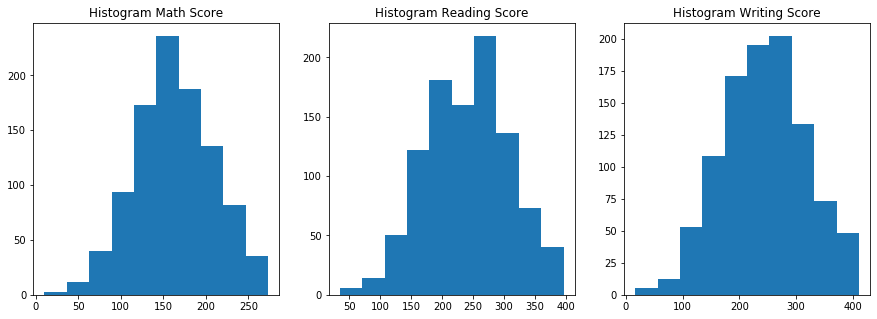

In [8]:
math_boxcox, _ = boxcox(student_df[student_df['math score'] > 0]['math score'])
reading_boxcox, _ = boxcox(student_df['reading score'])
writing_boxcox, _ = boxcox(student_df['writing score'])

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(math_boxcox)
plt.title('Histogram Math Score')

plt.subplot(1, 3, 2)
plt.hist(reading_boxcox)
plt.title('Histogram Reading Score')

plt.subplot(1, 3, 3)
plt.hist(writing_boxcox)
plt.title('Histogram Writing Score')

plt.show()

In [9]:
jb_stats = jarque_bera(math_boxcox)
norm_stats = normaltest(math_boxcox)

print('Math Score-----------')
print('Jarque Bera test statistic is {} and p value is {}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistic is {} and p value is {}'.format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_boxcox)
norm_stats = normaltest(reading_boxcox)

print('Reading Score-----------')
print('Jarque Bera test statistic is {} and p value is {}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistic is {} and p value is {}'.format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_boxcox)
norm_stats = normaltest(writing_boxcox)

print('Writing Score-----------')
print('Jarque Bera test statistic is {} and p value is {}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistic is {} and p value is {}'.format(norm_stats[0], norm_stats[1]))

Math Score-----------
Jarque Bera test statistic is 1.7200982636836308 and p value is 0.42314129209599327
Normality test statistic is 1.8323075851586939 and p value is 0.4000547794685686
Reading Score-----------
Jarque Bera test statistic is 4.119778573559666 and p value is 0.127468081515408
Normality test statistic is 5.282274606965809 and p value is 0.07128015626992971
Writing Score-----------
Jarque Bera test statistic is 4.746478090042761 and p value is 0.09317842784043195
Normality test statistic is 6.267311355052559 and p value is 0.04355827085003712


### Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed. 

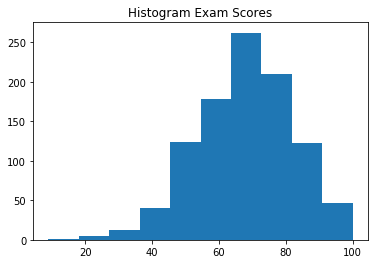

In [10]:
exam_scores = (student_df['math score'] + student_df['reading score'] + student_df['writing score']) / 3

plt.hist(exam_scores)
plt.title('Histogram Exam Scores')
plt.show()

In [11]:
jb_stats = jarque_bera(exam_scores)
norm_stats = normaltest(exam_scores)

print('Jarque Bera test statistic is {} and p value is {}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistic is {} and p value is {}'.format(norm_stats[0], norm_stats[1]))

Jarque Bera test statistic is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistic is 15.186721327231322 and p value is 0.0005037851534494478


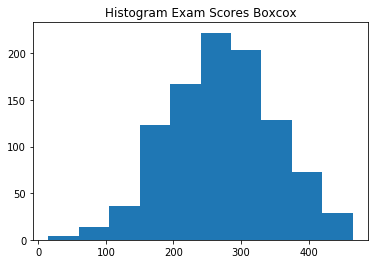

In [12]:
exam_boxcox, _ = boxcox(exam_scores)

plt.hist(exam_boxcox)
plt.title('Histogram Exam Scores Boxcox')
plt.show()

In [13]:
jb_stats = jarque_bera(exam_boxcox)
norm_stats = normaltest(exam_boxcox)

print('Jarque Bera test statistic is {} and p value is {}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistic is {} and p value is {}'.format(norm_stats[0], norm_stats[1]))

Jarque Bera test statistic is 2.4353989331279 and p value is 0.2959101356398447
Normality test statistic is 2.779857602227616 and p value is 0.24909303914726724
